<b><font color='darkred'>
DATA PREPARATION & DATA UNDERSTANDING
-----------------
➔ Daten ausdünnen & Daten in 3-dimensionalen Raum übertragen 

➔ Schweißkurven-Diagramme erstellen für jedes Feature ('power', 'force', 'dist')      
➔ zusätzlich mit Zugfestigkeit als Farbskala 
   
➔ Skalieren von Trainings- & Testdaten mit TsMaxScaler

t-SNE-Analyse der Daten
-----------------
➔ Verteilung der Klassen und Zugfestigkeiten = gutes Clustering 

In [1]:
import helper

In [2]:
# save data to get one train- & test-dataset
# helper.save_train_test(200)

In [3]:
zugversuche, kurven, versuche_train, versuche_test = helper.read_data()
versuche_train.shape, versuche_test.shape

((480, 5), (120, 5))

<b><font color='lightgreen'> Daten ausdünnen (nur Daten im Abstand bestimmter Anzahl an Datenpunkten nutzen) & Daten in 3-Dimensionen übertragen 

In [4]:
subsample = 80 # subsample austesten von versch. Längen 
ts_len = 800 # Länge der Zeitreihe

In [5]:
subsample = helper.Subsample(subsample, ts_len)
subsample.fit() # Dummy

Subsample(subsample=80, ts_len=800)

In [6]:
X_train = subsample.transform(versuche_train.key, kurven)
label_train = versuche_train.label.values
festigkeit_train = versuche_train.festigkeit.values
print(X_train.shape, label_train.shape)
print(X_train.max(axis=(0,1)))

X_test = subsample.transform(versuche_test.key, kurven)
label_test = versuche_test.label.values
festigkeit_test = versuche_test.festigkeit.values
print(X_test.shape)
print(X_test.max(axis=(0,1))) 

(480, 80, 3) (480,)
[3.63044e+03 6.26972e+02 3.41000e+00]
(120, 80, 3)
[3.53526e+03 6.17206e+02 3.21001e+00]


<b><font color='lightgreen'> Darstellung der Schweisskurven X_train

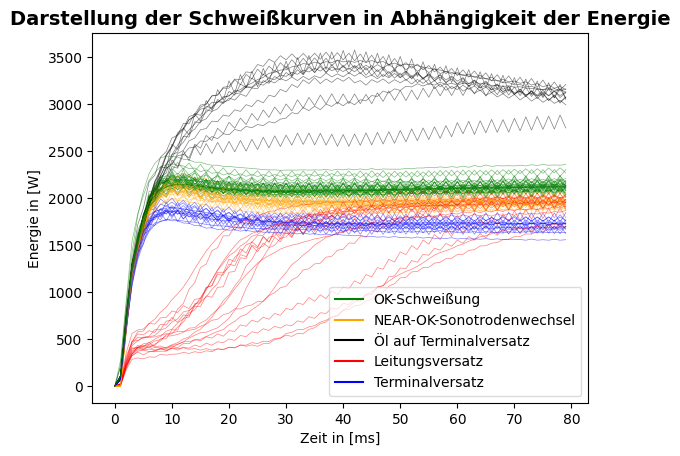

In [7]:
helper.plot_curves(X_train[:100,:,:], 0, label_train[:100], 'power')

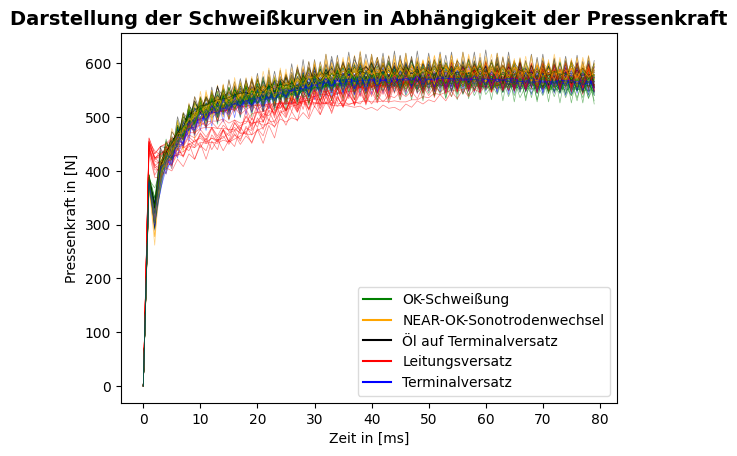

In [8]:
helper.plot_curves(X_train[:100,:,:], 1, label_train[:100], 'force')

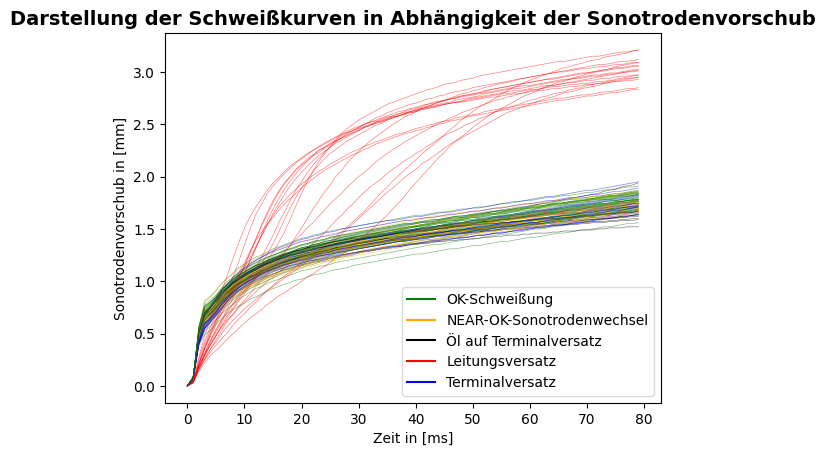

In [9]:
helper.plot_curves(X_train[:100,:,:], 2, label_train[:100], 'dist')

<b><font color='lightgreen'><h4>Darstellung der Schweisskurven in Betracht auf die Zugfestigkeit

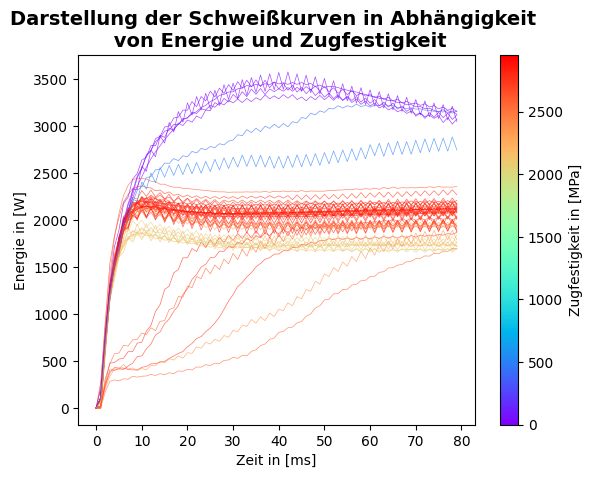

In [10]:
helper.plot_zug_curves(X_train[:50,:,:], 0, festigkeit_train[:50], 'power')

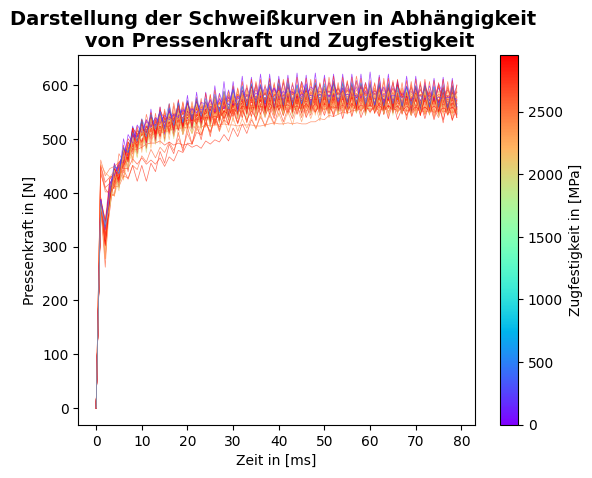

In [11]:
helper.plot_zug_curves(X_train[:50,:,:], 1, festigkeit_train[:50], 'force')

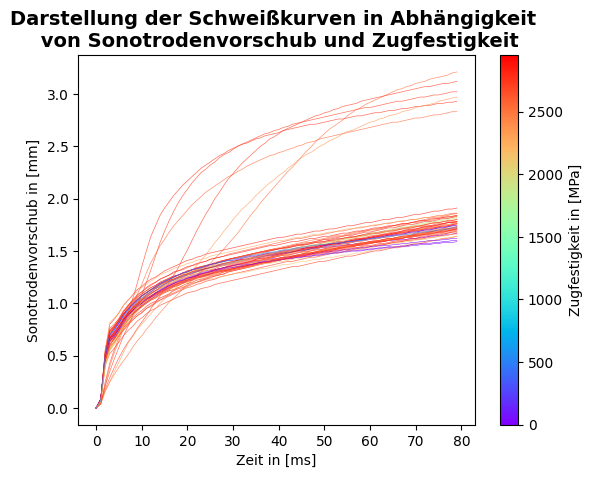

In [12]:
helper.plot_zug_curves(X_train[:50,:,:], 2, festigkeit_train[:50], 'dist')

<b><font color='darkred'> ____________________________________________________________________________________________________________________________________

<b><font color='lightgreen'> Skalieren von Trainings- & Testdaten mit TsMaxScaler

In [13]:
tsMaxScale = helper.TsMaxScaler()
tsMaxScale.fit(X_train)
X_train_scaled = tsMaxScale.transform(X_train)
X_test_scaled  = tsMaxScale.transform(X_test)

<b><font color='darkred'> 
t-SNE-Analyse der Daten
-----------------
➔ Verteilung der Klassen und Zugfestigkeiten = gutes Clustering        


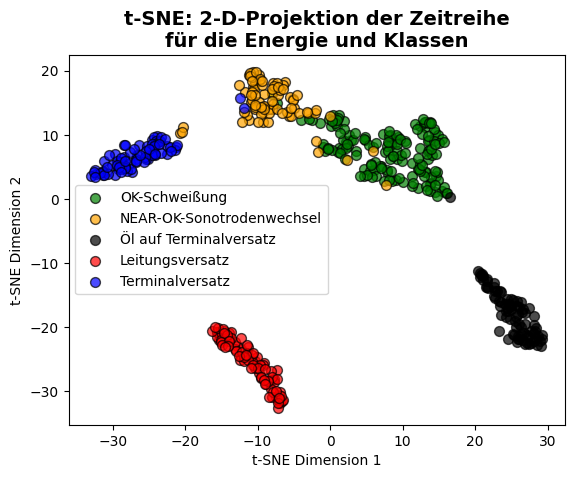

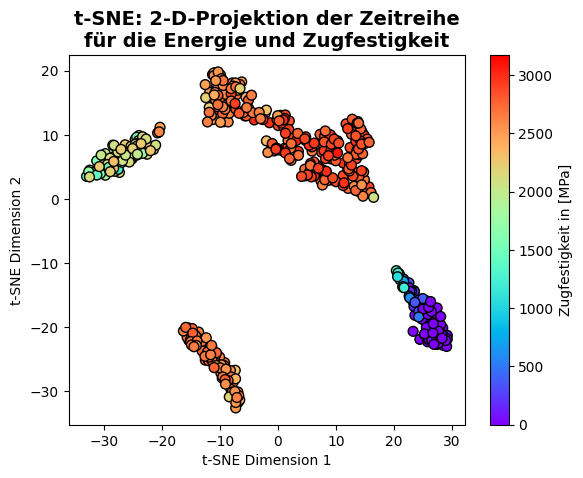

In [14]:
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Energie', 'Klassen')
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Energie', 'Zugfestigkeit')

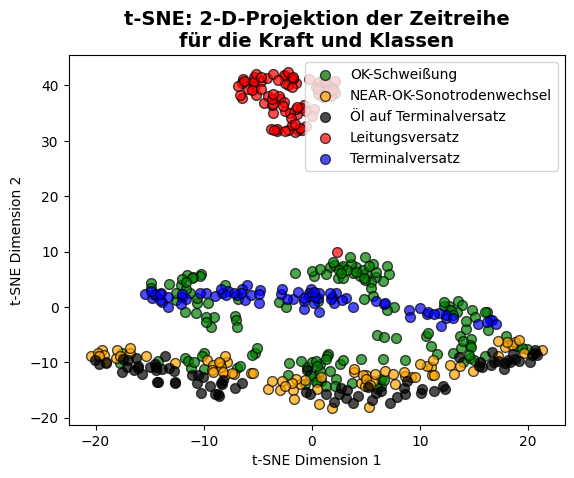

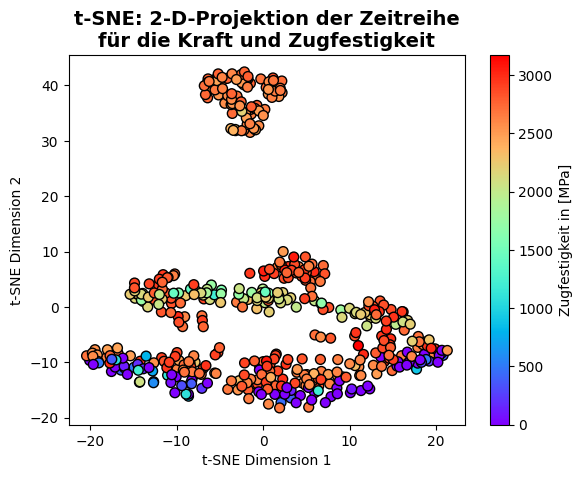

In [15]:
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Kraft', 'Klassen')
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Kraft', 'Zugfestigkeit')

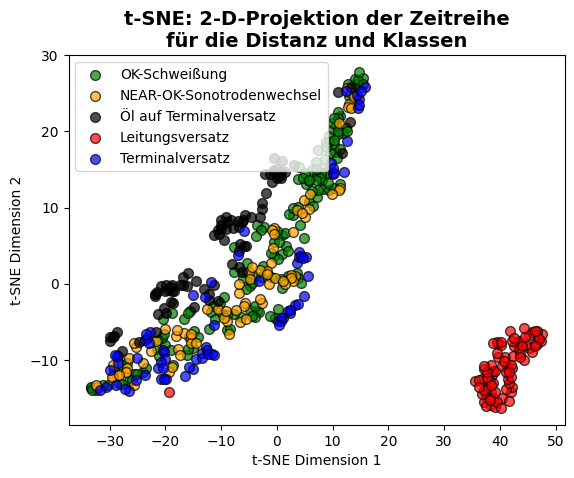

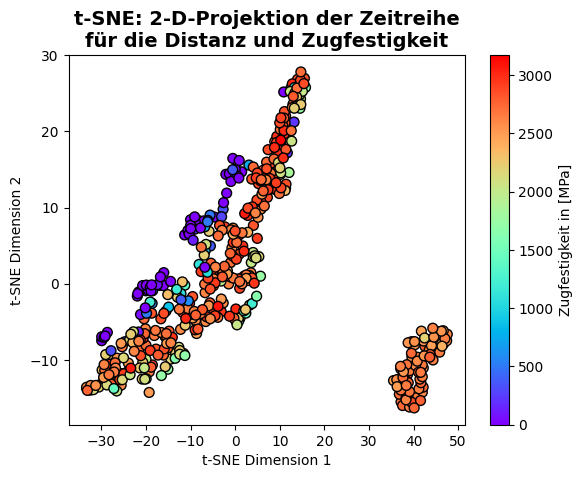

In [16]:
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Distanz', 'Klassen')
helper.plotTSNE(X_train_scaled, festigkeit_train, label_train, 'Distanz', 'Zugfestigkeit')